In [1]:
#necessary modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
%matplotlib inline
import warnings

#for modeling (Sklearn)
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, KFold, cross_val_score, RandomizedSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.decomposition import PCA


In [102]:
#to see the maximum columns present in the dataset
pd.set_option('display.max_columns', None)

In [103]:
#ignoring thr warning
warnings.filterwarnings("ignore")

In [104]:
cd C:\Users\baps\Downloads

C:\Users\baps\Downloads


In [105]:
pwd

'C:\\Users\\baps\\Downloads'

In [106]:
#reading the data by panas
flight_data = pd.read_excel("Flight_Fare_Prediction.xlsx")

In [107]:
#checking the head
flight_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [108]:
#get he basic info of the data
flight_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [109]:
#get the unique count of the Duration variable
flight_data["Duration"].value_counts()

2h 50m     550
1h 30m     386
2h 45m     337
2h 55m     337
2h 35m     329
          ... 
31h 30m      1
30h 25m      1
42h 5m       1
4h 10m       1
47h 40m      1
Name: Duration, Length: 368, dtype: int64

In [110]:
#checking whether any null values present in the dataset
flight_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [111]:
#Getting the unqiue route
flight_data.Route.unique()

array(['BLR → DEL', 'CCU → IXR → BBI → BLR', 'DEL → LKO → BOM → COK',
       'CCU → NAG → BLR', 'BLR → NAG → DEL', 'CCU → BLR',
       'BLR → BOM → DEL', 'DEL → BOM → COK', 'DEL → BLR → COK',
       'MAA → CCU', 'CCU → BOM → BLR', 'DEL → AMD → BOM → COK',
       'DEL → PNQ → COK', 'DEL → CCU → BOM → COK', 'BLR → COK → DEL',
       'DEL → IDR → BOM → COK', 'DEL → LKO → COK',
       'CCU → GAU → DEL → BLR', 'DEL → NAG → BOM → COK',
       'CCU → MAA → BLR', 'DEL → HYD → COK', 'CCU → HYD → BLR',
       'DEL → COK', 'CCU → DEL → BLR', 'BLR → BOM → AMD → DEL',
       'BOM → DEL → HYD', 'DEL → MAA → COK', 'BOM → HYD',
       'DEL → BHO → BOM → COK', 'DEL → JAI → BOM → COK',
       'DEL → ATQ → BOM → COK', 'DEL → JDH → BOM → COK',
       'CCU → BBI → BOM → BLR', 'BLR → MAA → DEL',
       'DEL → GOI → BOM → COK', 'DEL → BDQ → BOM → COK',
       'CCU → JAI → BOM → BLR', 'CCU → BBI → BLR', 'BLR → HYD → DEL',
       'DEL → TRV → COK', 'CCU → IXR → DEL → BLR',
       'DEL → IXU → BOM → COK', 'CCU 

In [112]:
#uniquw of total stops
flight_data.Total_Stops.unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', nan, '4 stops'],
      dtype=object)

In [113]:
#dropping the data as it's count is low
flight_data = flight_data.dropna()

In [114]:
#checking the data
flight_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [115]:
#shape of the data
flight_data.shape

(10682, 11)

In [116]:
#as the year is just one after finding, I do not extract year
flight_data.Date_of_Journey.unique()

array(['24/03/2019', '1/05/2019', '9/06/2019', '12/05/2019', '01/03/2019',
       '24/06/2019', '12/03/2019', '27/05/2019', '1/06/2019',
       '18/04/2019', '9/05/2019', '24/04/2019', '3/03/2019', '15/04/2019',
       '12/06/2019', '6/03/2019', '21/03/2019', '3/04/2019', '6/05/2019',
       '15/05/2019', '18/06/2019', '15/06/2019', '6/04/2019',
       '18/05/2019', '27/06/2019', '21/05/2019', '06/03/2019',
       '3/06/2019', '15/03/2019', '3/05/2019', '9/03/2019', '6/06/2019',
       '24/05/2019', '09/03/2019', '1/04/2019', '21/04/2019',
       '21/06/2019', '27/03/2019', '18/03/2019', '12/04/2019',
       '9/04/2019', '1/03/2019', '03/03/2019', '27/04/2019'], dtype=object)

In [117]:
#checking the unqiue of the year
pd.to_datetime(flight_data.Date_of_Journey, format = "%d/%m/%Y").dt.year.unique()

array([2019], dtype=int64)

In [118]:
#since all the date belong to 2019 we will not extract year
#extracting the day
flight_data["Travelled_Date"] = pd.to_datetime(flight_data.Date_of_Journey,format="%d/%m/%Y").dt.day

In [119]:
#extracting the month
flight_data["Travelled_month"] = pd.to_datetime(flight_data.Date_of_Journey, format = "%d/%m/%Y").dt.month

In [120]:
#checking the head and the shaoe of the data after extraction
print(flight_data.head())
print(f"The shape is : {flight_data.shape}")

       Airline Date_of_Journey    Source Destination                  Route  \
0       IndiGo      24/03/2019  Banglore   New Delhi              BLR → DEL   
1    Air India       1/05/2019   Kolkata    Banglore  CCU → IXR → BBI → BLR   
2  Jet Airways       9/06/2019     Delhi      Cochin  DEL → LKO → BOM → COK   
3       IndiGo      12/05/2019   Kolkata    Banglore        CCU → NAG → BLR   
4       IndiGo      01/03/2019  Banglore   New Delhi        BLR → NAG → DEL   

  Dep_Time  Arrival_Time Duration Total_Stops Additional_Info  Price  \
0    22:20  01:10 22 Mar   2h 50m    non-stop         No info   3897   
1    05:50         13:15   7h 25m     2 stops         No info   7662   
2    09:25  04:25 10 Jun      19h     2 stops         No info  13882   
3    18:05         23:30   5h 25m      1 stop         No info   6218   
4    16:50         21:35   4h 45m      1 stop         No info  13302   

   Travelled_Date  Travelled_month  
0              24                3  
1               1 

In [121]:
#dropping the unnecessary columns
flight_data.drop(["Date_of_Journey"], axis=1, inplace=True)

In [122]:
#getting the columns names
flight_data.columns

Index(['Airline', 'Source', 'Destination', 'Route', 'Dep_Time', 'Arrival_Time',
       'Duration', 'Total_Stops', 'Additional_Info', 'Price', 'Travelled_Date',
       'Travelled_month'],
      dtype='object')

In [123]:
#extracting the hour and minute as we do noe need to format them
flight_data["Departure_hour"] = pd.to_datetime(flight_data["Dep_Time"]).dt.hour
flight_data["Departure_min"] = pd.to_datetime(flight_data["Dep_Time"]).dt.minute
flight_data.drop(["Dep_Time"], axis=1, inplace=True)

In [124]:
#extracting the hour and minute as we do noe need to format them
flight_data["Arrival_hour"] = pd.to_datetime(flight_data["Arrival_Time"]).dt.hour
flight_data["Arrival_min"] = pd.to_datetime(flight_data["Arrival_Time"]).dt.minute
flight_data.drop(["Arrival_Time"], axis=1, inplace=True)


In [125]:
#making the list
Duration = list(flight_data["Duration"])
Duration

['2h 50m',
 '7h 25m',
 '19h',
 '5h 25m',
 '4h 45m',
 '2h 25m',
 '15h 30m',
 '21h 5m',
 '25h 30m',
 '7h 50m',
 '13h 15m',
 '2h 35m',
 '2h 15m',
 '12h 10m',
 '2h 35m',
 '26h 35m',
 '4h 30m',
 '22h 35m',
 '23h',
 '20h 35m',
 '5h 10m',
 '15h 20m',
 '2h 50m',
 '2h 55m',
 '13h 20m',
 '15h 10m',
 '5h 45m',
 '5h 55m',
 '2h 50m',
 '2h 15m',
 '2h 15m',
 '13h 25m',
 '2h 50m',
 '22h',
 '5h 30m',
 '10h 25m',
 '5h 15m',
 '2h 30m',
 '6h 15m',
 '11h 55m',
 '11h 5m',
 '8h 30m',
 '22h 5m',
 '2h 45m',
 '12h',
 '2h 50m',
 '2h 50m',
 '2h 15m',
 '16h 5m',
 '19h 55m',
 '3h 15m',
 '25h 20m',
 '2h 50m',
 '3h',
 '2h 50m',
 '16h 15m',
 '15h 5m',
 '2h 15m',
 '6h 30m',
 '25h 5m',
 '12h 25m',
 '27h 20m',
 '10h 15m',
 '10h 30m',
 '2h 15m',
 '10h 25m',
 '2h 50m',
 '1h 30m',
 '13h 20m',
 '2h 15m',
 '1h 25m',
 '26h 30m',
 '7h 20m',
 '13h 30m',
 '5h',
 '2h 45m',
 '2h 50m',
 '1h 30m',
 '19h 5m',
 '2h 15m',
 '14h 50m',
 '2h 40m',
 '22h 10m',
 '9h 35m',
 '10h',
 '21h 20m',
 '5h 25m',
 '18h 45m',
 '12h 20m',
 '18h',
 '9h 15

In [126]:
#corecting the form for extraction of hour and minute
for i in range(len(Duration)):
    if len(Duration[i].split())!=2:
        if "h" in Duration[i]:
            Duration[i] = Duration[i].strip() + " 0m"
        else:
            Duration[i] = "0h " + Duration[i]
            

In [127]:
#makeing the list and then append the values in the lists
Duration_hour = []
Duration_min=[]
for i in range(len(Duration)):
    Duration_hour.append(re.sub("h"," ", Duration[i]).split()[0])
    Duration_min.append(re.sub("m"," ",Duration[i]).split()[-1])

In [128]:
#adding new columns
flight_data["duration_hour"] = Duration_hour
flight_data["duration_min"] = Duration_min

In [129]:
#drop unnecessary columns
flight_data.drop(["Duration"], axis=1, inplace=True)

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64


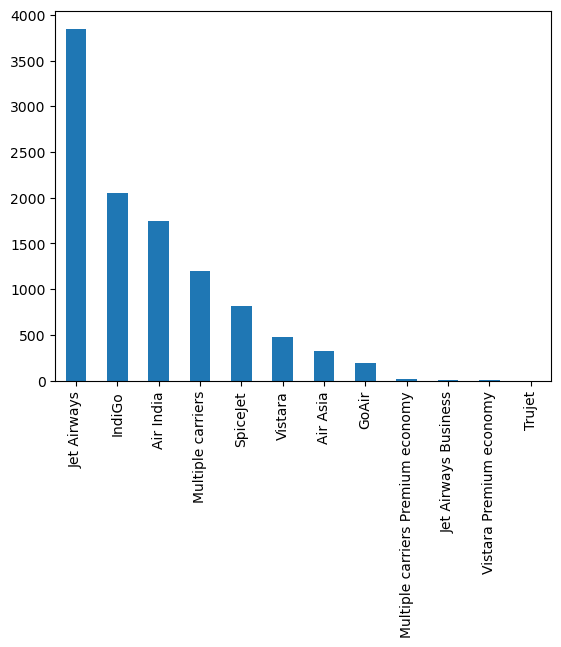

In [130]:
#seeing the fluction means that the Airline is importatnt so we can go for one hot encoding
flight_data["Airline"].value_counts().plot(kind="bar")
print(f"{flight_data.Airline.value_counts()}")

Airline
Air Asia                              5590.260188
Air India                             9612.427756
GoAir                                 5861.056701
IndiGo                                5673.682903
Jet Airways                          11643.923357
Jet Airways Business                 58358.666667
Multiple carriers                    10902.678094
Multiple carriers Premium economy    11418.846154
SpiceJet                              4338.284841
Trujet                                4140.000000
Vistara                               7796.348643
Vistara Premium economy               8962.333333
Name: Price, dtype: float64


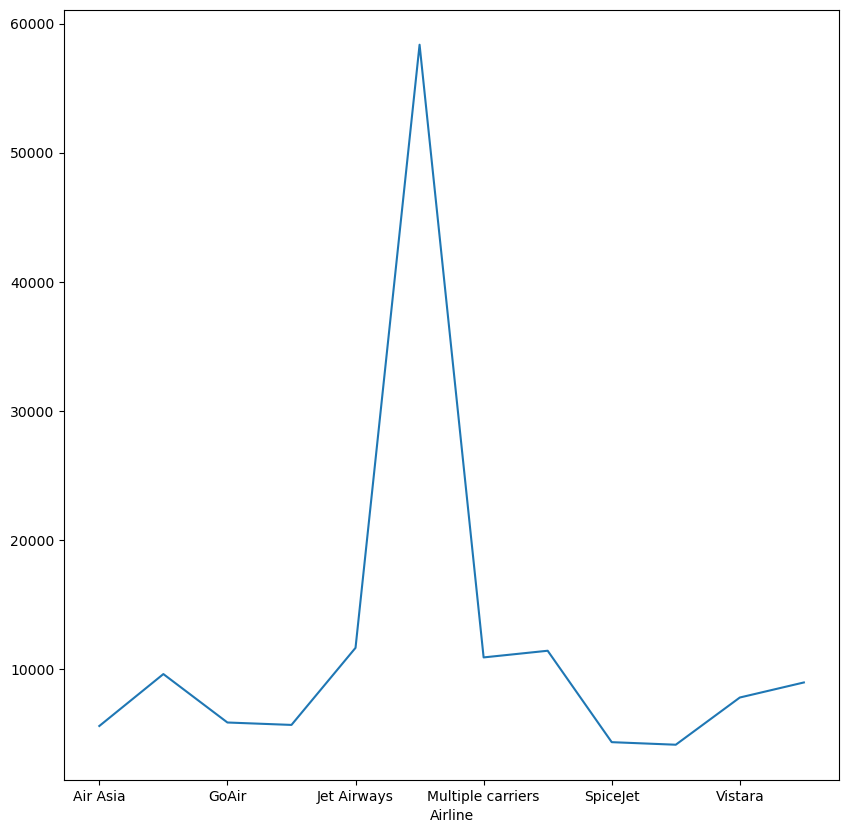

In [131]:
#to see the realtionship between Types of Airline and price
flight_data.groupby("Airline")["Price"].mean().plot(figsize=(10,10))
print(flight_data.groupby("Airline")["Price"].mean())

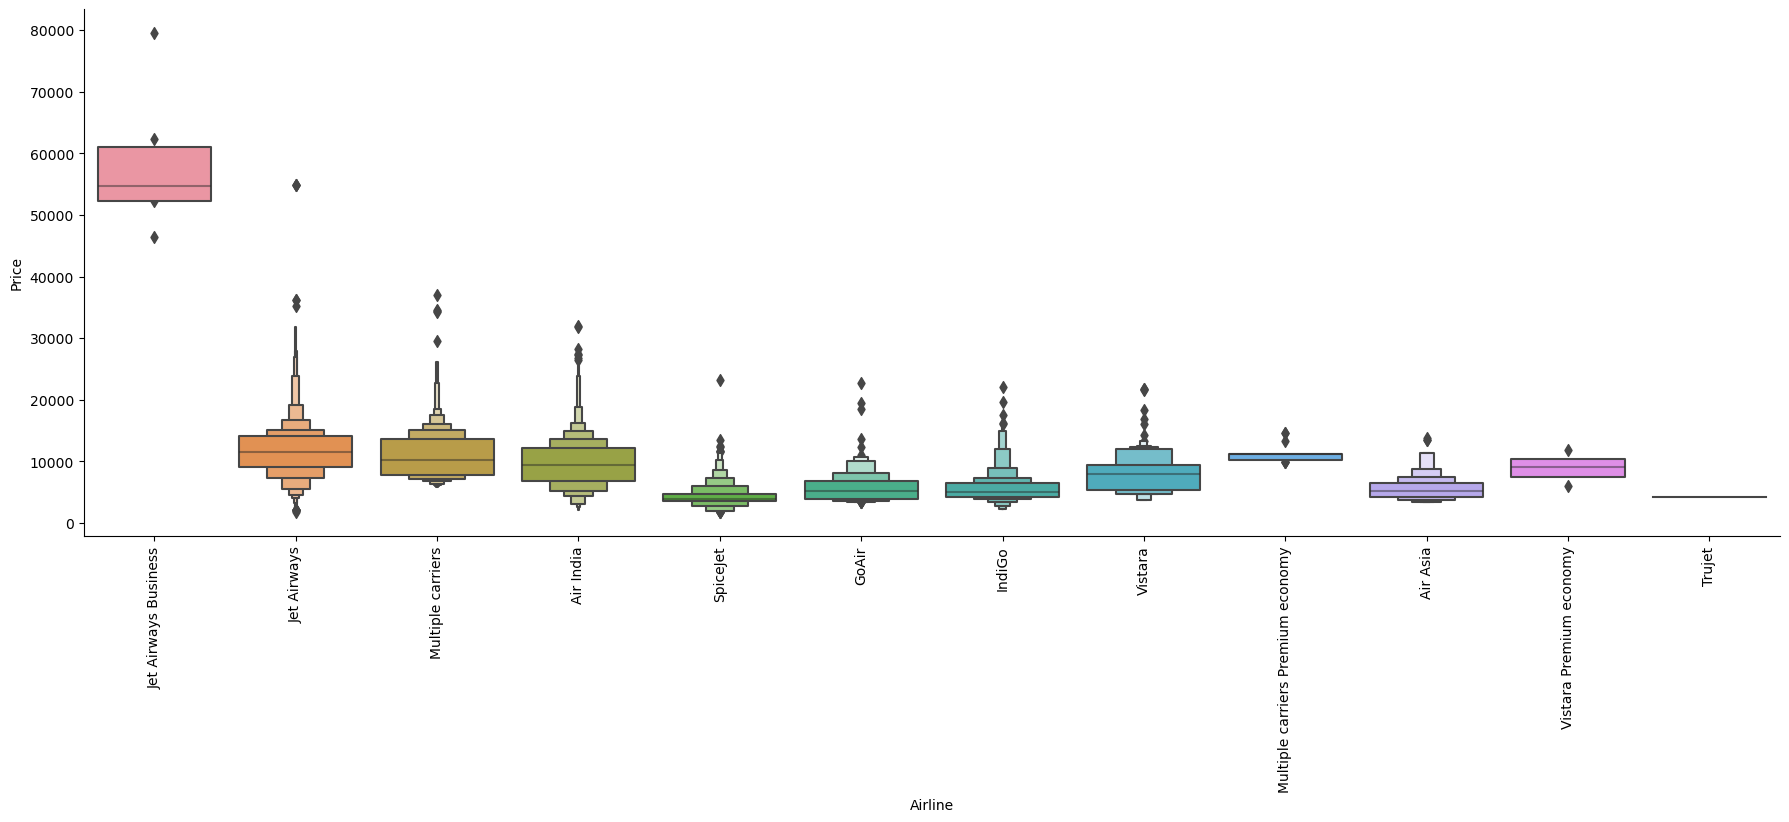

In [132]:
#to see the realtionship between Types of Airline and price
sns.catplot(y="Price",x="Airline",data = flight_data.sort_values("Price", ascending=False), kind="boxen", height = 6 , aspect =3, )
plt.xticks(rotation=90)
plt.show()

In [133]:
#one hot encoding to see the impact of each Airline on the price after analysis
Airline = flight_data[["Airline"]]
Airline = pd.get_dummies(Airline, drop_first=True)

In [134]:
#value count of Source
flight_data.Source.value_counts()

Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

<AxesSubplot:xlabel='Source'>

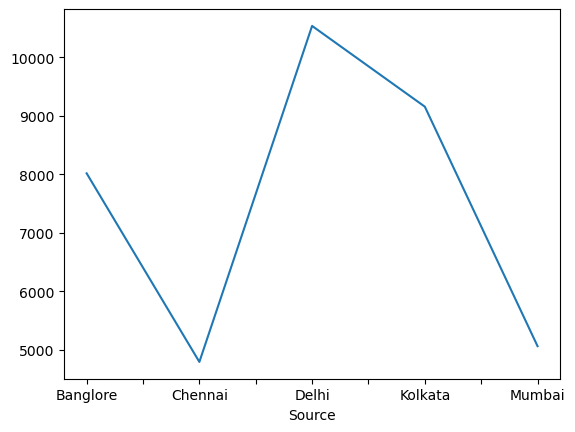

In [135]:
# realtionship between source and price
flight_data.groupby("Source")["Price"].mean().plot()

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Banglore'),
  Text(1, 0, 'Kolkata'),
  Text(2, 0, 'Delhi'),
  Text(3, 0, 'Chennai'),
  Text(4, 0, 'Mumbai')])

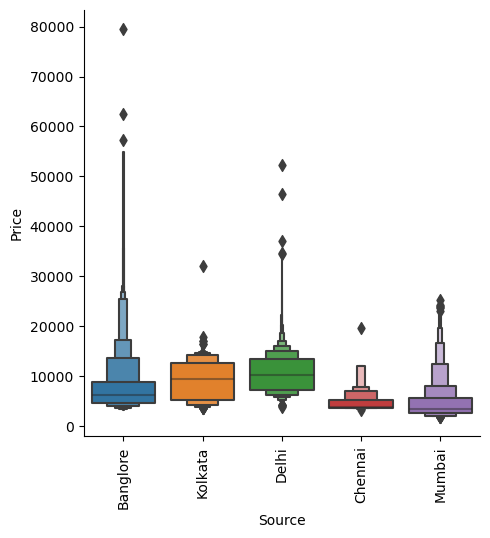

In [136]:
#boxplot between source and price
sns.catplot(x="Source", y="Price", kind="boxen", data = flight_data)
plt.xticks(rotation=90)

In [137]:
#one hot encoding to see the impact of each Airline on the price after analysis 
Source = flight_data[["Source"]]
Source = pd.get_dummies(Source, drop_first=True)
Source.head()

,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0


In [138]:
#one hot encoding to see the impact of each Airline on the price after analysis
Destination = flight_data[["Destination"]]
Destination = pd.get_dummies(Destination, drop_first=True)
Destination.head()

,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,0,0,0,1
1,0,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1


In [139]:
#dropping the unnecessary columns
flight_data.drop(["Route","Additional_Info"], inplace =True, axis=1)

In [140]:
#unique count of total stops
flight_data["Total_Stops"].value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

Text(0.5, 1.0, 'Relationship between Stops and Price')

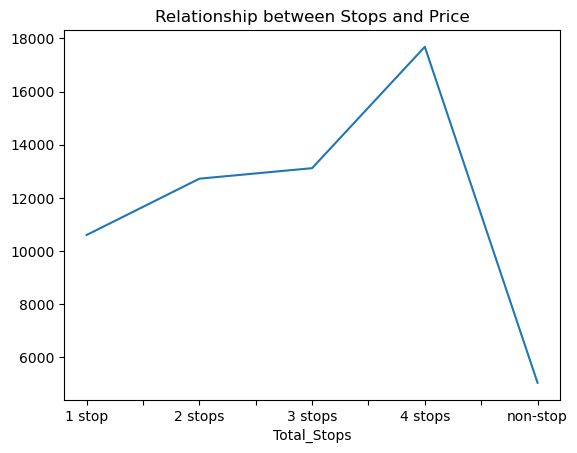

In [141]:
#Relationship between Stops and price
flight_data.groupby("Total_Stops")["Price"].mean().plot()
plt.title("Relationship between Stops and Price")

In [142]:
#encoding by dictionery
flight_data.replace({"non-stop":0,"1 stop":1,"2 stops":2,"3 stops":3,"4 stops":4},inplace=True)

In [143]:
#concatenate all the dataframes to one dataframe for ease of use
flight_data = pd.concat([flight_data, Airline, Source, Destination], axis=1)

In [144]:
#checking the head
flight_data.head()

,Airline,Source,Destination,Total_Stops,Price,Travelled_Date,Travelled_month,Departure_hour,Departure_min,Arrival_hour,Arrival_min,duration_hour,duration_min,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,IndiGo,Banglore,New Delhi,0,3897,24,3,22,20,1,10,2,50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,Air India,Kolkata,Banglore,2,7662,1,5,5,50,13,15,7,25,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,Jet Airways,Delhi,Cochin,2,13882,9,6,9,25,4,25,19,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,IndiGo,Kolkata,Banglore,1,6218,12,5,18,5,23,30,5,25,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,IndiGo,Banglore,New Delhi,1,13302,1,3,16,50,21,35,4,45,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [145]:
#dropping the columns which are already encoded
flight_data.drop(["Airline","Source","Destination"], inplace=True, axis=1)

In [146]:
#seperating the data into target and predictors which are Price and the remaining, respectively
x = flight_data.drop(["Price"], axis = 1)
y = flight_data.Price

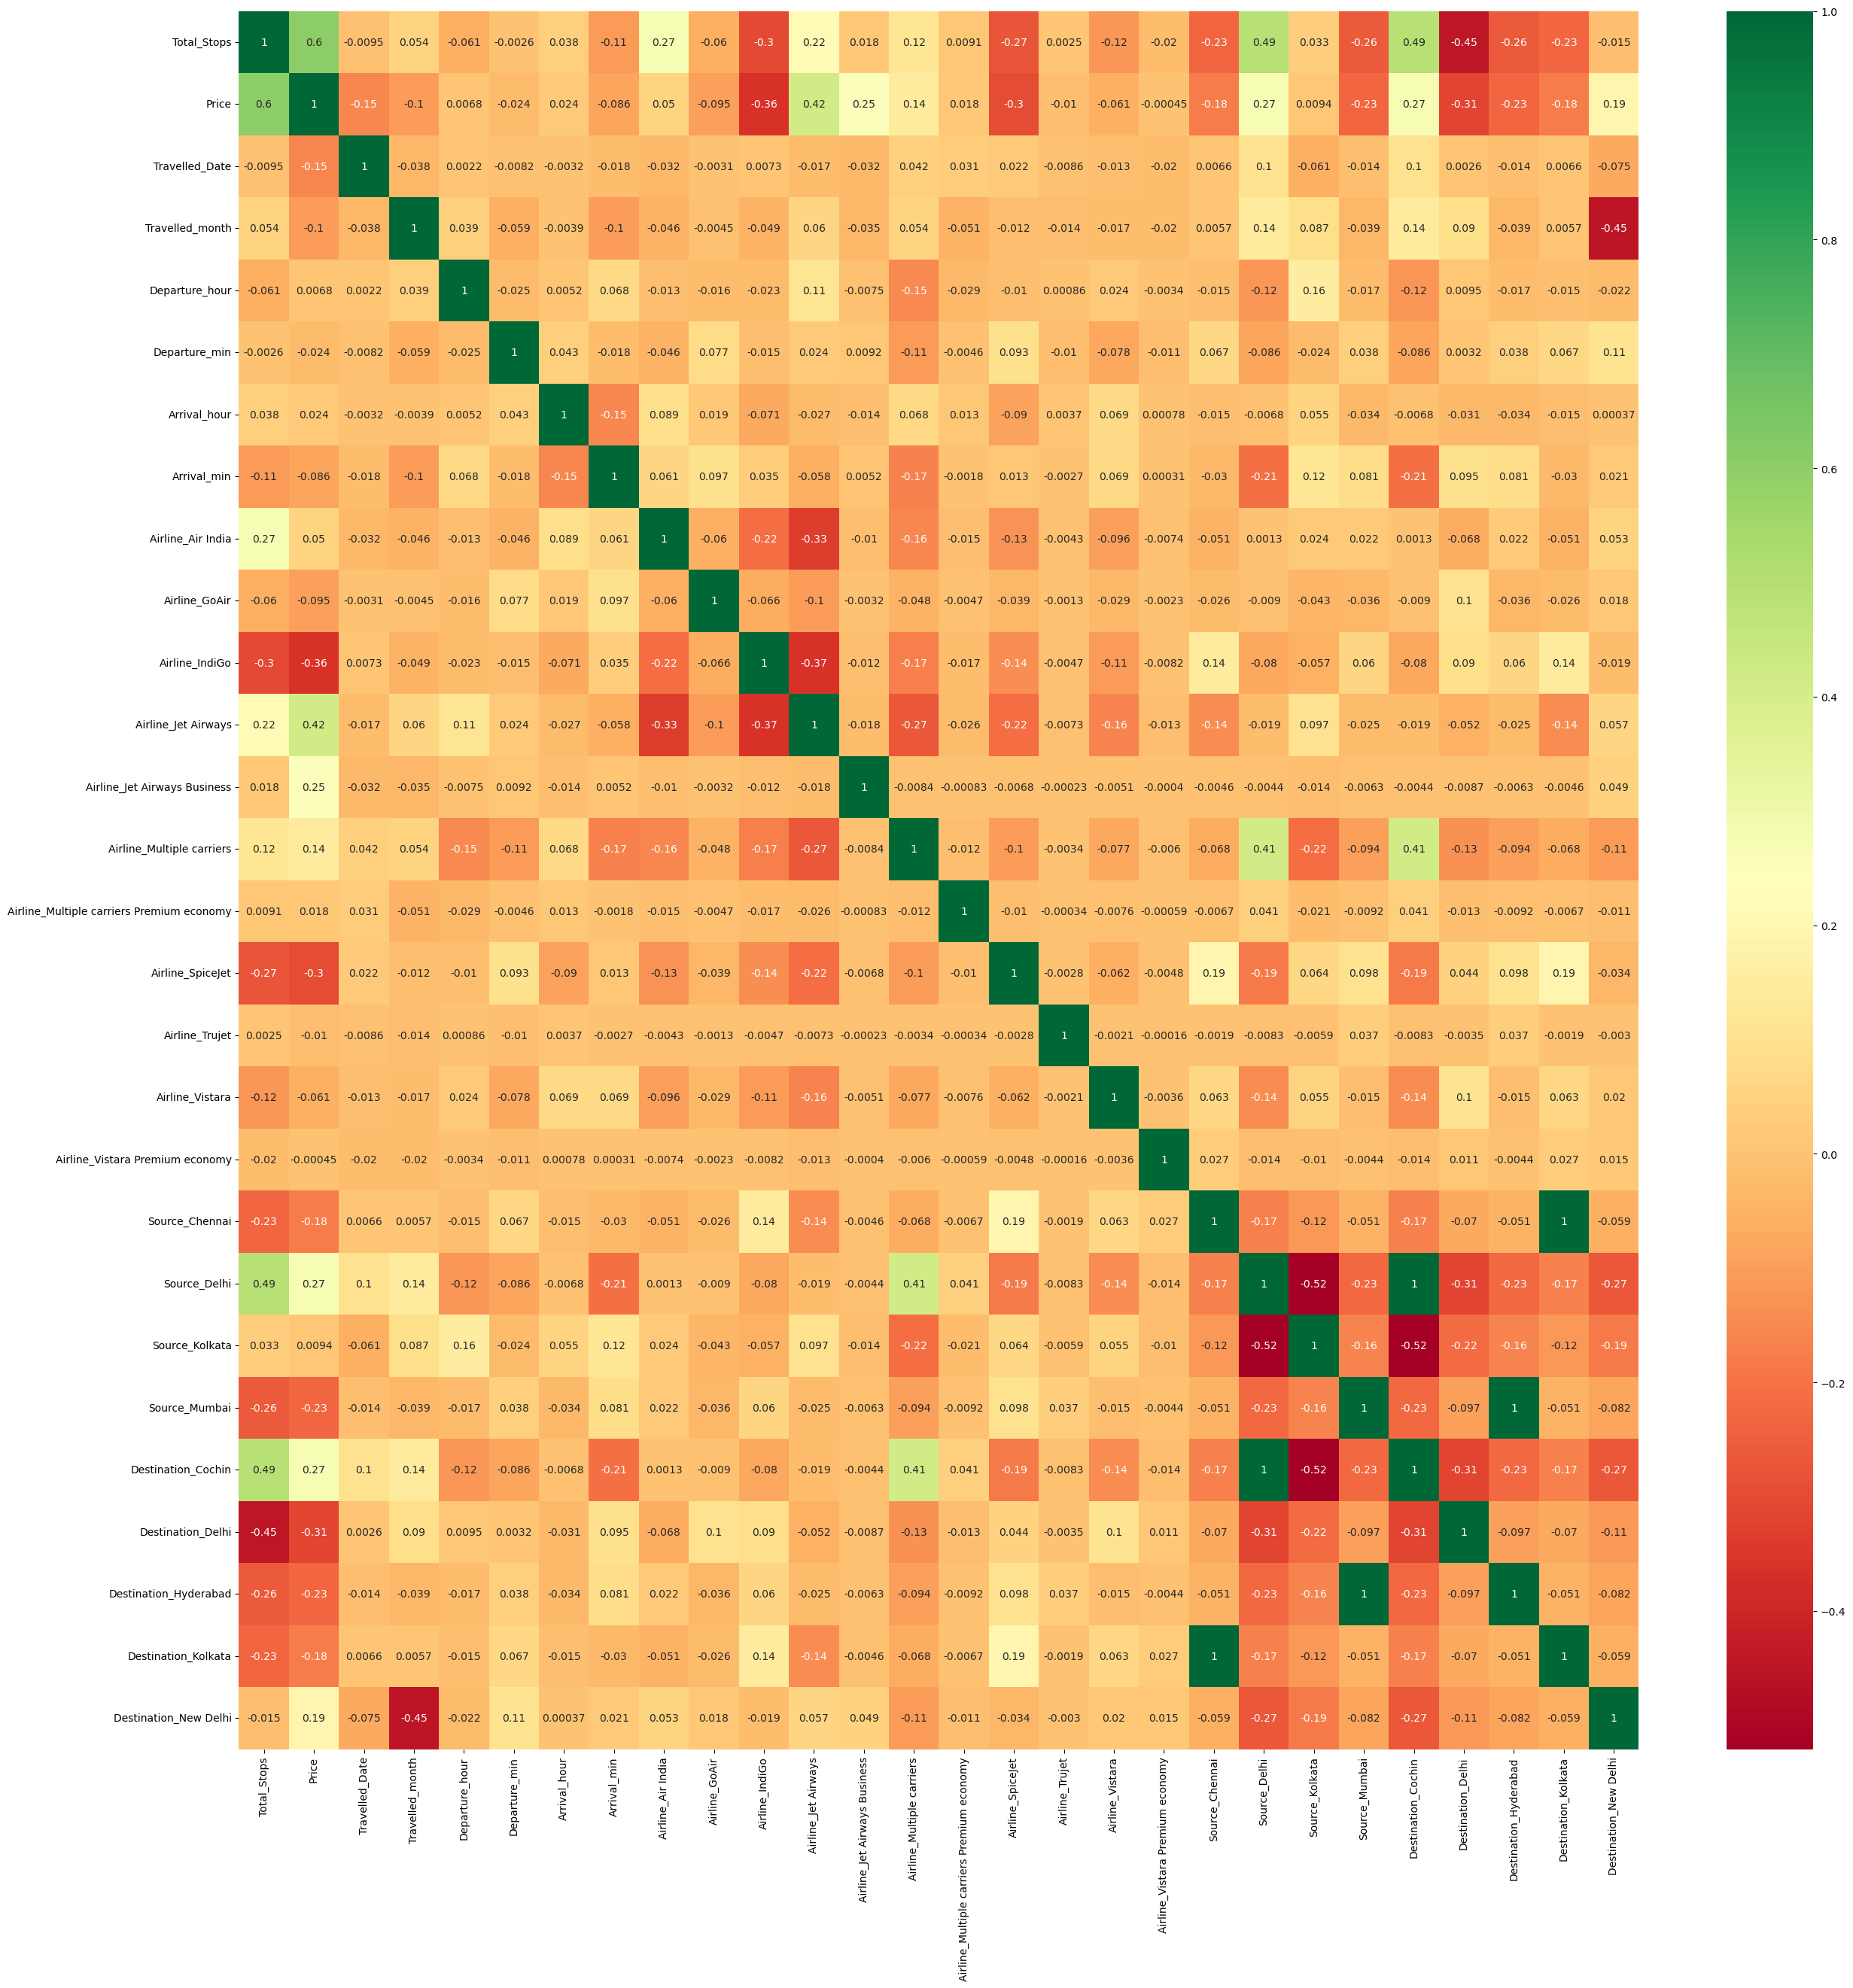

In [147]:
#heatmap to see the correaltion between the variables
plt.figure(figsize=(30,30))
sns.heatmap(flight_data.corr(), annot=True, cmap = "RdYlGn")
plt.show()

In [148]:
#splitting the dataset into train and test with testing size of 20 and training size of 80
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.2, random_state=12)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(8545, 29)
(2137, 29)
(8545,)
(2137,)


In [149]:
#initializing the Linear regression model
Linear_Model = LinearRegression()
Linear_Model.fit(x_train, y_train)

LinearRegression()

In [150]:
#getting the metics of it
Training_score = Linear_Model.score(x_train, y_train)
print(f"The training score is: {Training_score,2}")
Testing_Score = Linear_Model.score(x_test, y_test)
print(f"The testing score is: {Testing_Score}")

The training score is: (0.6285912585945672, 2)
The testing score is: 0.6020678865066553


In [151]:
#as the accuracy is not good we can run multiple models on it
Models = [DecisionTreeRegressor, SVR, RandomForestRegressor, KNeighborsRegressor, AdaBoostRegressor]

for model in Models:
    ML_model = model()
    ML_model = ML_model.fit(x_train, y_train)
    print(f"{ML_model}'s testing accuracy is {(ML_model.score(x_test, y_test))}")
    

DecisionTreeRegressor()'s testing accuracy is 0.6589366367491168
SVR()'s testing accuracy is 0.0032975070863506817
RandomForestRegressor()'s testing accuracy is 0.7603947724232616
KNeighborsRegressor()'s testing accuracy is 0.567200218781936
AdaBoostRegressor()'s testing accuracy is 0.265263714231492


In [50]:
#cross validation on every algorithms
models = []
models.append(("KNN", KNeighborsRegressor()))
models.append(("RF", RandomForestRegressor()))
models.append(("ADa", AdaBoostRegressor()))
models.append(("SVM", SVR()))
models.append(("DT", DecisionTreeRegressor()))

result = []
names = []

for name, mod in models:
    kfold = KFold(n_splits=10)
    cv_result = cross_val_score (mod, x_train , y_train , cv = kfold)
    names.append(name)
    result.append(cv_result)
for i in range(len(names)):
    print(names[i], result[i].mean())

KNN 0.5684359798838905
RF 0.626562386078183
ADa 0.4303179087846106
SVM 0.0012789380636318848
DT 0.5651853710436343


[2.07482479e-01 1.44222816e-01 5.29590286e-02 2.38856371e-02
 2.12847028e-02 2.69493836e-02 2.01117004e-02 1.33157659e-01
 1.77583381e-02 9.50223018e-03 1.75998900e-03 1.62168100e-02
 1.45217300e-01 6.81866612e-02 2.07779332e-02 8.88081556e-04
 2.64110057e-03 9.38753285e-05 4.88606560e-03 8.71995728e-05
 5.00958575e-04 1.36208766e-02 3.40951244e-03 7.68906966e-03
 8.40944832e-03 1.55725782e-02 7.28927886e-03 4.44500646e-04
 2.49947862e-02]


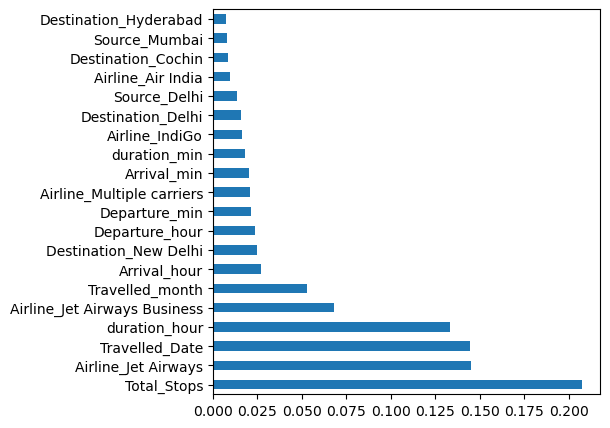

In [152]:
#As seen from the accuracy, feature engineering must be done in order to redcue overfitting
#feature selection by ExtraTressRegressor
Feature_selection = ExtraTreesRegressor()
Feature_selection.fit(x,y)
#getting the importance
print(f"{Feature_selection.feature_importances_}")
#plot the figure according to their importance and relation with Price (Target variable)
plt.figure(figsize=(5,5))
feature_im = pd.Series(Feature_selection.feature_importances_, index = x.columns)
feature_im.nlargest(20).plot(kind="barh")
plt.show()

In [153]:
a=feature_im.nlargest(5)
a=pd.DataFrame(a).transpose()
imp_columns = a.columns
imp_columns

Index(['Total_Stops', 'Airline_Jet Airways', 'Travelled_Date', 'duration_hour',
       'Airline_Jet Airways Business'],
      dtype='object')

In [154]:
for indes, name in enumerate(x.columns):
    print([indes], name)    

[0] Total_Stops
[1] Travelled_Date
[2] Travelled_month
[3] Departure_hour
[4] Departure_min
[5] Arrival_hour
[6] Arrival_min
[7] duration_hour
[8] duration_min
[9] Airline_Air India
[10] Airline_GoAir
[11] Airline_IndiGo
[12] Airline_Jet Airways
[13] Airline_Jet Airways Business
[14] Airline_Multiple carriers
[15] Airline_Multiple carriers Premium economy
[16] Airline_SpiceJet
[17] Airline_Trujet
[18] Airline_Vistara
[19] Airline_Vistara Premium economy
[20] Source_Chennai
[21] Source_Delhi
[22] Source_Kolkata
[23] Source_Mumbai
[24] Destination_Cochin
[25] Destination_Delhi
[26] Destination_Hyderabad
[27] Destination_Kolkata
[28] Destination_New Delhi


In [155]:
#selecting the best features from the ExtraTreeClassifier
X_feature_train = x_train[['Total_Stops', 'Airline_Jet Airways', 'duration_hour',
       'Airline_Jet Airways Business', 'Departure_hour']]
X_feature_test =x_test[['Total_Stops', 'Airline_Jet Airways', 'duration_hour',
       'Airline_Jet Airways Business', 'Departure_hour']]

print(f"The sphape of x train is: {X_feature_train.shape}")
print(f"The sphape of x test is: {X_feature_test.shape}")
print(f"The shape of y train is: {y_train.shape}")
print(f"The shape of y test is: {y_test.shape}")

#performing the same random forest with this features
# now we got the best params through rf_cv, we can run and get the robust model by making the difference between training and testing
rf_model_2 = RandomForestRegressor()
rf_model_2.fit(X_feature_train,y_train)
y_predicts = rf_model_2.predict(X_feature_test)
print(f" Training score of Random Forest is {rf_model_2.score(X_feature_train, y_train)}")
print(f" Testing score of Random Forest is {rf_model_2.score(X_feature_test, y_test)}")

The sphape of x train is: (8545, 5)
The sphape of x test is: (2137, 5)
The shape of y train is: (8545,)
The shape of y test is: (2137,)
 Training score of Random Forest is 0.6931313581045833
 Testing score of Random Forest is 0.506062958262403


In [156]:
#as random forest works best, we performed that and the accuracy Presented below
Random_regr = RandomForestRegressor()
Random_regr.fit(x_train, y_train)
y_prdiction = Random_regr.predict (x_test)
print(f" training score of Random Forest is {Random_regr.score(x_train, y_train)}")
print(f" testing score of Random Forest is {Random_regr.score(x_test, y_test)}")


 training score of Random Forest is 0.955934556520996
 testing score of Random Forest is 0.7601029934546597


In [157]:
Random_regr.get_params().keys()

dict_keys(['bootstrap', 'ccp_alpha', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'max_samples', 'min_impurity_decrease', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start'])

In [158]:
#getting the possible parameters from Random_regr.get_params().keys() and then feed the values
n_estimators = [int(x) for x in np.linspace(100,1200,12)]
max_features = ['auto','sqrt']
max_depth = [int(x) for x in np.linspace(5,30,6)]
min_samples_split = [2,5,10,15,100]
min_samples_leaf = [1,2,5,10]



In [159]:
#apply dictionery to it to feed it to algorithm
random_grid = {'n_estimators': n_estimators,
               "max_features" : max_features,
               "max_depth" : max_depth,
               "min_samples_split": min_samples_split,
               "min_samples_leaf" : min_samples_leaf}

In [160]:
#RandomizedCVSearch for hyper parameter tuning
rf_cv= RandomizedSearchCV(estimator=Random_regr, param_distributions=random_grid,
                             scoring='neg_mean_squared_error',n_iter=10 , cv = 5, random_state=34, n_jobs=1 )

In [97]:
rf_cv.fit(x_train, y_train)


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=34, scoring='neg_mean_squared_error')

In [99]:
#getting the best parameter
best_parameters = rf_cv.best_estimator_


RandomForestRegressor(max_depth=30, min_samples_leaf=2, min_samples_split=15,
                      n_estimators=600)

In [161]:
#now we got the best params through rf_cv, we can run and get the robust model by making the difference between training and testing
rf_model_1 = RandomForestRegressor(n_estimators=700,
                                  min_samples_split=5,
                                  min_samples_leaf=2,
                                  max_features='auto',
                                  max_depth=15)
rf_model_1.fit(x_train,y_train)
y_predicts = rf_model_1.predict(x_test)
print(f" training score of Random Forest is {rf_model_1.score(x_train, y_train)}")
print(f" testing score of Random Forest is {rf_model_1.score(x_test, y_test)}")

 training score of Random Forest is 0.9244341961415965
 testing score of Random Forest is 0.7703104992818381


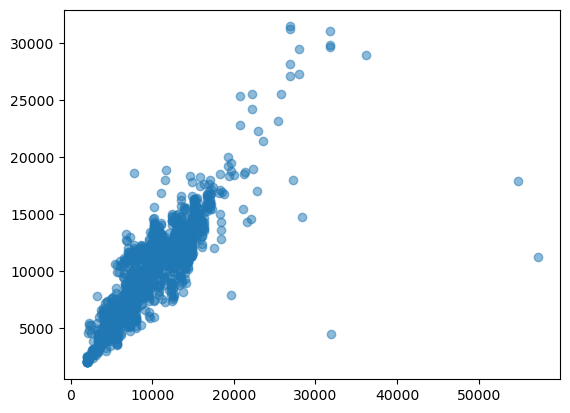

In [162]:
#plotting
plt.scatter(y_test , y_predicts, alpha = 0.5)

In [163]:
#get the metrics related to Linear regression
print(f" the mean absolute error is : {mean_absolute_error(y_test, y_predicts)}")
print(f" the mean sqaured error is : {mean_squared_error(y_test, y_predicts)}")
print(f" the r2 score is : {r2_score(y_test, y_predicts)}")

 the mean absolute error is : 1183.2577358516162
 the mean sqaured error is : 4878926.699243742
 the r2 score is : 0.7703104992818381
